In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import random

from PIL import Image

pd.options.mode.chained_assignment = None

random_state = 10
random.seed(random_state)
base_path = '../src/data/external/ISIC_2019_Training_Input/'
image_prefix = '.jpg'

# https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T

In [2]:
meta_df = pd.read_csv('../src/data/external/ISIC_2019_Training_Metadata.csv')
truth_df = pd.read_csv('../src/data/external/ISIC_2019_Training_GroundTruth.csv')

In [3]:
display(meta_df)
display(truth_df)

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(meta_df['image'].dtype)
print(truth_df['image'].dtype)

object
object


In [5]:
labels = truth_df.columns
labels = labels[1:]
print(labels)
label_mapping = {i: label for i, label in enumerate(labels)}
print(label_mapping)

Index(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], dtype='object')
{0: 'MEL', 1: 'NV', 2: 'BCC', 3: 'AK', 4: 'BKL', 5: 'DF', 6: 'VASC', 7: 'SCC', 8: 'UNK'}


In [6]:
dense_labels = truth_df[labels]
dense_labels = dense_labels.values
print('Dense Labels...')
display(dense_labels)
train_labels = np.argmax(dense_labels, axis=-1)
print('Train Labels...')
display(train_labels)

Dense Labels...


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Train Labels...


array([1, 1, 0, ..., 0, 1, 4])

In [7]:
truth_df['label'] = train_labels.tolist()
display(truth_df)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [8]:
truth_df[['image', 'label']]

,image,label
0,ISIC_0000000,1
1,ISIC_0000001,1
2,ISIC_0000002,0
3,ISIC_0000003,1
4,ISIC_0000004,0
...,...,...
25326,ISIC_0073247,2
25327,ISIC_0073248,4
25328,ISIC_0073249,0
25329,ISIC_0073251,1


In [9]:
merged_df = meta_df.join(truth_df.set_index('image'), on='image', how='left')
display(merged_df)

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label
0,ISIC_0000000,55.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,ISIC_0000001,30.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,ISIC_0000002,60.0,upper extremity,NaN,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ISIC_0000003,30.0,upper extremity,NaN,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,ISIC_0000004,80.0,posterior torso,NaN,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
# lesion_id is just id for same lesion but different images and so we can ignore this redundant column in features
sum(merged_df['lesion_id'].isnull())

2084

In [11]:
# Site details add more information to model and so fill with unknown if not available
print(f"Count of null values in anatom_site_general column before null fill: {sum(merged_df['anatom_site_general'].isnull())}")
merged_df['anatom_site_general'] = merged_df['anatom_site_general'].fillna('unknown')
print(f"Count of null values in anatom_site_general column after null fill: {sum(merged_df['anatom_site_general'].isnull())}")

Count of null values in anatom_site_general column before null fill: 2631
Count of null values in anatom_site_general column after null fill: 0


In [12]:
# Sex details add more information to model and so fill with unknown if not available
print(f"Count of null values in sex column before null fill: {sum(merged_df['sex'].isnull())}")
merged_df['sex'] = merged_df['sex'].fillna('unknown')
print(f"Count of null values in sex column after null fill: {sum(merged_df['sex'].isnull())}")

Count of null values in sex column before null fill: 384
Count of null values in sex column after null fill: 0


In [13]:
sum(merged_df['age_approx'].isnull())

437

In [14]:
# Age is important for the model and so we remove rows not available
clean_df = merged_df[~merged_df['age_approx'].isnull()]
clean_df

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label
0,ISIC_0000000,55.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,ISIC_0000001,30.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,ISIC_0000002,60.0,upper extremity,NaN,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ISIC_0000003,30.0,upper extremity,NaN,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,ISIC_0000004,80.0,posterior torso,NaN,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [15]:
clean_df['anatom_site_general'].unique()

array(['anterior torso', 'upper extremity', 'posterior torso',
       'lower extremity', 'lateral torso', 'head/neck', 'palms/soles',
       'unknown', 'oral/genital'], dtype=object)

In [16]:
len(clean_df['lesion_id'].unique())

11771

In [17]:
int(min(clean_df['label'].value_counts()))

239

In [18]:
# decreasing the scope of anatomy site can provide more information and so getting a more generic information
clean_df['anatomy_site'] = clean_df['anatom_site_general'].apply(lambda anatomy: anatomy.split()[-1])
display(clean_df)
clean_df.describe()

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label,anatomy_site
0,ISIC_0000000,55.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,torso
1,ISIC_0000001,30.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,torso
2,ISIC_0000002,60.0,upper extremity,NaN,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,extremity
3,ISIC_0000003,30.0,upper extremity,NaN,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,extremity
4,ISIC_0000004,80.0,posterior torso,NaN,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,torso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,head/neck
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,torso
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,extremity
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,palms/soles


,age_approx,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label
count,24894.000000,24894.000000,24894.000000,24894.000000,24894.000000,24894.000000,24894.000000,24894.000000,24894.000000,24894.0,24894.000000
mean,54.028481,0.178236,0.504459,0.133245,0.034707,0.104362,0.009601,0.010163,0.025227,0.0,1.578091
std,18.130971,0.382719,0.499990,0.339846,0.183041,0.305736,0.097514,0.100301,0.156817,0.0,1.539915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,55.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000
max,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,7.000000


In [19]:
def get_sampled_indices(df, ratio):
  total = len(df)
  sample_size = int(min(df['label'].value_counts()) * ratio)
  
  indices = []
  for label in label_mapping:
    observations = df[df['label'] == label].index.values
    if len(observations) >= sample_size:
      indices.extend(random.sample(observations.tolist(), sample_size))
  return indices

In [20]:
train_idx = get_sampled_indices(clean_df, 0.6)

unseen_idx = list(set(clean_df.index.values) - set(train_idx))
eval_idx = get_sampled_indices(clean_df.loc[unseen_idx], 0.5)

seen_idx = train_idx + eval_idx
unseen_idx = list(set(clean_df.index.values) - set(seen_idx))
test_idx = get_sampled_indices(clean_df.loc[unseen_idx], 1)
all_test_idx = list(set(clean_df.index.values) - set(seen_idx))

train_idx.sort()
eval_idx.sort()
test_idx.sort()
all_test_idx.sort()
# print(f"Train: {train_idx}")
# print(f"Eval: {eval_idx}")
# print(f"Test: {test_idx}")
# print(f"All-Test: {all_test_idx}")

In [21]:
train_df = clean_df.loc[train_idx]
train_df

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label,anatomy_site
152,ISIC_0000162,40.0,anterior torso,NaN,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,torso
162,ISIC_0000173,65.0,upper extremity,NaN,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,extremity
235,ISIC_0000252,75.0,lower extremity,NaN,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,extremity
257,ISIC_0000281,25.0,posterior torso,NaN,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,torso
579,ISIC_0004115_downsampled,15.0,unknown,NaN,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25289,ISIC_0073195,70.0,lower extremity,BCN_0005492,male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,extremity
25310,ISIC_0073223,80.0,upper extremity,BCN_0005542,female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,extremity
25312,ISIC_0073225,55.0,lower extremity,BCN_0000286,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,extremity
25320,ISIC_0073238,45.0,upper extremity,BCN_0005240,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,extremity


[0 1 2 3 4 5 6 7]
['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']


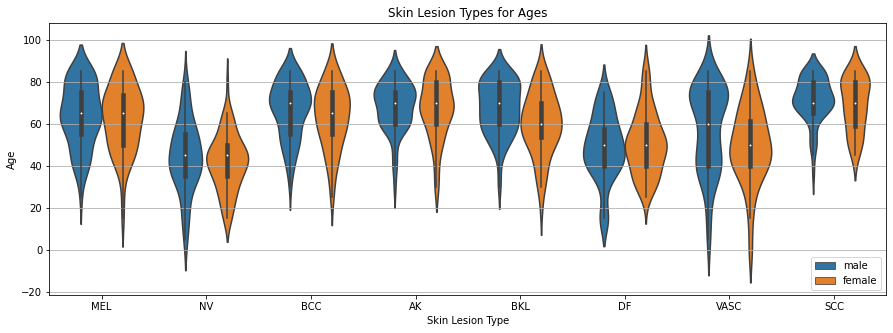

In [22]:
label_ids = clean_df['label'].unique()
label_ids.sort()
print(label_ids)
labels = [label_mapping[label] for label in label_ids]
print(labels)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
sns.violinplot(data=train_df, x='label', y='age_approx', hue='sex')
ax.set_xticks(label_ids)
ax.set_xticklabels(labels)
ax.set_xlabel('Skin Lesion Type')
ax.yaxis.grid(True)
ax.set_ylabel('Age')
ax.set_title('Skin Lesion Types for Ages')
ax.legend(loc='lower right')
plt.show()

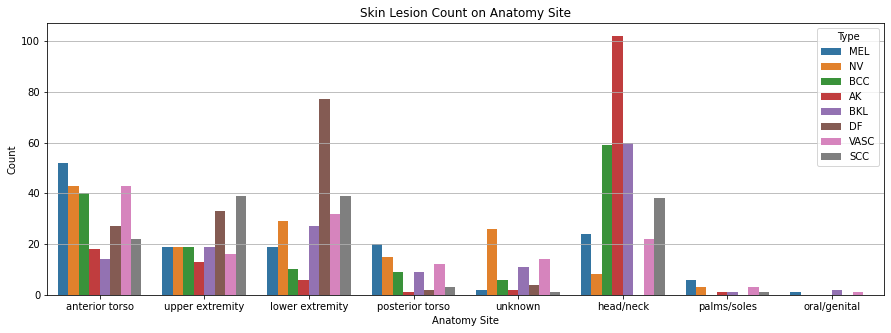

In [23]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
sns.countplot(data=train_df, x='anatom_site_general', hue='label')
ax.set_xlabel('Anatomy Site')
ax.yaxis.grid(True)
ax.set_ylabel('Count')
ax.legend(labels, title="Type")
ax.set_title('Skin Lesion Count on Anatomy Site')
plt.show()

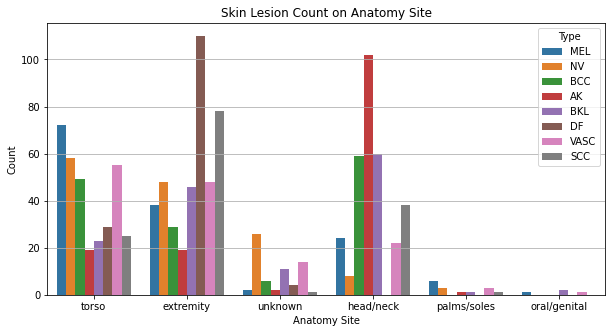

In [24]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
sns.countplot(data=train_df, x='anatomy_site', hue='label')
ax.set_xlabel('Anatomy Site')
ax.yaxis.grid(True)
ax.set_ylabel('Count')
ax.legend(labels, title="Type")
ax.set_title('Skin Lesion Count on Anatomy Site')
plt.show()

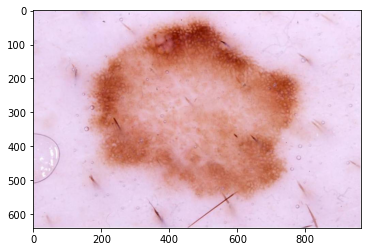

In [25]:
base_path = '../src/data/external/ISIC_2019_Training_Input/'
img = mpimg.imread(f"{base_path}/ISIC_0000162.jpg")
plt.imshow(img)
plt.show()
# YOUR CODE HERE

# buckets = [[] for _ in labels]
# remaining = len(labels)
# i = 0
# limit = 5
# while remaining > 0:
#   if len(buckets[Y_train[i]]) < limit:
#     buckets[Y_train[i]].append(i)
#     if len(buckets[Y_train[i]]) == limit:
#       remaining -= 1
#   i += 1

# fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(10, 25))
# for r in range(len(buckets)):
#   for c in range(limit):
#     j = buckets[r][c]
    
#     image = X_train[j]
#     label = Y_train[j]
#     label_name = label_names[label]
#     axs[r][c].imshow(image, cmap='gray')
#     axs[r][c].set_title(label_name)
#     axs[r][c].axis('off')
# plt.show()

In [26]:
img = Image.open(f"{base_path}/ISIC_0000162.jpg")
print(f"{img.width}/{img.height}")

964/640
